In [1]:
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt, matplotlib.patches as patches

In [3]:
coco=COCO('dataset/Fold1/test_mask.json')

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [28]:
# Get list of category_ids, here [1] for covid
category_ids = coco.getCatIds(['normal'])
category_ids

[0]

In [29]:
# Get list of image_ids which contain covid
image_ids = coco.getImgIds(catIds=[0])
print(image_ids[0:])

[128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]


In [40]:
# Get all lung annotations for image 1.jpg
annotation_ids = coco.getAnnIds(imgIds=128, catIds=[0])
print(len(annotation_ids))

2


In [41]:
# These five annotation objects can then be loaded into a list anns
anns = coco.loadAnns(annotation_ids)
images = coco.loadImgs(ids=128)

In [42]:
for ann in anns:
    print(ann['bbox'])

[51, 11, 78, 153]
[148, 10, 78, 160]


In [43]:
for image in images:
    print(image)

image = images[0]

{'file_name': 'CXR_Mask_1006.bmp', 'height': 256, 'id': 128, 'path': 'dataset/Fold1/test_mask/normal/CXR_Mask_1006.bmp', 'width': 256}


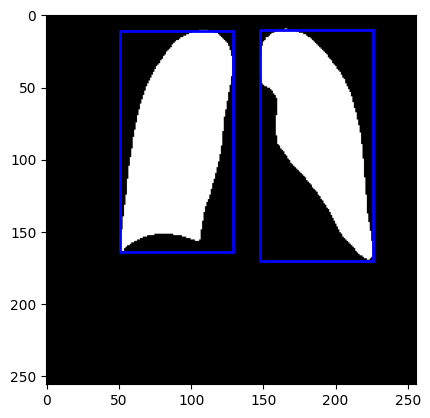

In [44]:
image = Image.open(image['path'])
 
fig, ax = plt.subplots()
 
# Draw boxes and add label to each box
for ann in anns:
    box = ann['bbox']
    bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2, edgecolor="blue", facecolor="none")
    ax.add_patch(bb)
 
ax.imshow(image, cmap='gray')
plt.show()